In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
%matplotlib inline

# Initialisation Data frame

In [89]:
dfinal=pd.DataFrame(columns=('BarLat','BarLong','Rayon','Number','date'))
dfinal.loc[0] =[0,0, 0,0,0]

# Lecture des données

In [90]:
df = pd.read_csv('../data/aden_golfe.csv',sep=';')
size = len(df)

In [91]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (with max distance)')
        plt.xlabel('sample index')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [92]:
df["date"]=df.apply(lambda row: str(row["Annee (0)"]) +"-"+ str(row["mois (0)"]), axis=1)

In [93]:
df["date"].unique()

array(['2010-10', '2010-1', '2010-2', '2010-3', '2010-5', '2010-6',
       '2010-7', '2010-8', '2010-9', '2010-11', '2010-4', '2010-12',
       '2008-2', '2008-3', '2008-4', '2008-5', '2008-7', '2008-8',
       '2008-9', '2008-10', '2008-11', '2008-12', '2008-6', '2009-1',
       '2009-2', '2009-3', '2009-4', '2009-5', '2009-7', '2009-12',
       '2009-6', '2009-8', '2009-9', '2009-10', '2009-11', '2011-1',
       '2011-4', '2011-9', '2011-2', '2011-5', '2011-7', '2011-8',
       '2011-10', '2011-3', '2011-11', '2011-6', '2011-12', '2012-2',
       '2012-12', '2012-3', '2012-4', '2012-1', '2012-6', '2012-5',
       '2012-7', '2013-3', '2013-6', '2013-5', '2013-7', '2013-12',
       '2014-1', '2014-4', '2014-2', '2014-3', '2014-8', '2014-12'], dtype=object)

17


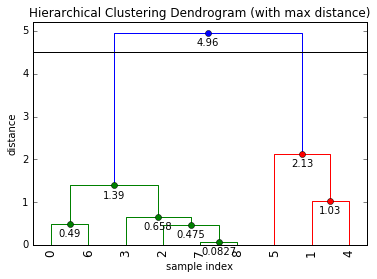

[1 2 1 1 2 2 1 1 1]


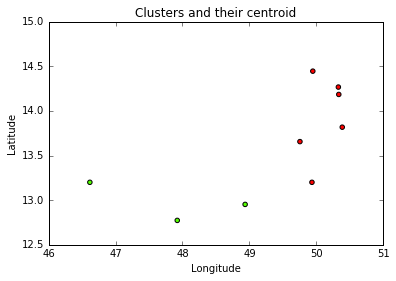

In [240]:
date = df["date"].unique()[k]
#sous ensemble des données correspondant à la date choisie
subDf = df[df["date"]==date]
#construction du dataframe 2D
X = subDf[["longitude","latitude"]].values
#clusterisation
Z = linkage(X, 'ward', metric = 'euclidean')
#affichage du dendrogram
print k
max_d = 4.5  #

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    max_d=max_d,  # arret du dendrogram
)
plt.show()
#recuperation des clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
print clusters
#calcul du barycentre de chaque cluster

centroidX = []
centroidY = []
for i in range(min(clusters),max(clusters)+1):
    x = np.mean(X[clusters==i,0])
    y = np.mean(X[clusters==i,1])
    centroidX.append(x)
    centroidY.append(y)
    maxIdx=dfinal.index.values.max() 
    #print maxIdx
    dfinal.loc[maxIdx+1] =[x, y, 0,len(clusters[clusters==i]),date]

#affichage des clusters
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
#plt.scatter(centroidX,centroidY,cmap='prism')
plt.title('Clusters and their centroid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#dataframe final
#print dfinal

In [239]:
k=k+1

In [205]:
k=0